In [3]:
import random
import numpy as np
from data_process import get_CIFAR10_data, get_MUSHROOM_data
from scipy.spatial import distance
from models import Perceptron, SVM, Softmax, Logistic
from kaggle_submission import output_submission_csv
%matplotlib inline

# For auto-reloading external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Loading Mushroom

In the following cells we determine the splitting of the mushroom dataset.
<br /> TRAINING + VALIDATION = 0.8, TESTING = 0.2

In [4]:
# TRAINING = 0.6 indicates 60% of the data is used as the training dataset.
VALIDATION = 0.2

In [5]:
data = get_MUSHROOM_data(VALIDATION)
X_train_MR, y_train_MR = data['X_train'], data['y_train']
X_val_MR, y_val_MR = data['X_val'], data['y_val']
X_test_MR, y_test_MR = data['X_test'], data['y_test']
n_class_MR = len(np.unique(y_test_MR))

print("Number of train samples: ", X_train_MR.shape[0])
print("Number of val samples: ", X_val_MR.shape[0])
print("Number of test samples: ", X_test_MR.shape[0])

Number of train samples:  4874
Number of val samples:  1625
Number of test samples:  1625


### Get Accuracy

This function computes how well your model performs using accuracy as a metric.

In [6]:
def get_acc(pred, y_test):
    return np.sum(y_test == pred) / len(y_test) * 100

# Logistic Classifier

The Logistic Classifier has 2 hyperparameters that you can experiment with:
- **Learning rate** - controls how much we change the current weights of the classifier during each update. We set it at a default value of 0.5, but you should experiment with different values. We recommend changing the learning rate by factors of 10 and observing how the performance of the classifier changes. You should also try adding a **decay** which slowly reduces the learning rate over each epoch.
- **Number of Epochs** - An epoch is a complete iterative pass over all of the data in the dataset. During an epoch we predict a label using the classifier and then update the weights of the classifier according to the logistic regression update rule for each sample in the training set. You should try different values for the number of training epochs and report your results.

You will implement the Logistic Classifier in the **models/logistic.py**

The following code: 
- Creates an instance of the Logistic classifier class 
- The train function of the Logistic class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy

### Training Logistic Classifer

In [64]:
learning_rate = 0.028
n_epochs = 290

lr = Logistic(learning_rate, n_epochs)
lr.train(X_train_MR, y_train_MR)

In [65]:
pred_lr = lr.predict(X_train_MR)
print('The training accuracy is given by: %f' % (get_acc(pred_lr, y_train_MR)))

The training accuracy is given by: 90.439064


### Validate Logistic Classifer

In [66]:
pred_lr = lr.predict(X_val_MR)
print('The validation accuracy is given by: %f' % (get_acc(pred_lr, y_val_MR)))

The validation accuracy is given by: 89.846154


### Test Logistic Classifier

In [67]:
pred_lr = lr.predict(X_test_MR)
print('The testing accuracy is given by: %f' % (get_acc(pred_lr, y_test_MR)))

The testing accuracy is given by: 89.415385


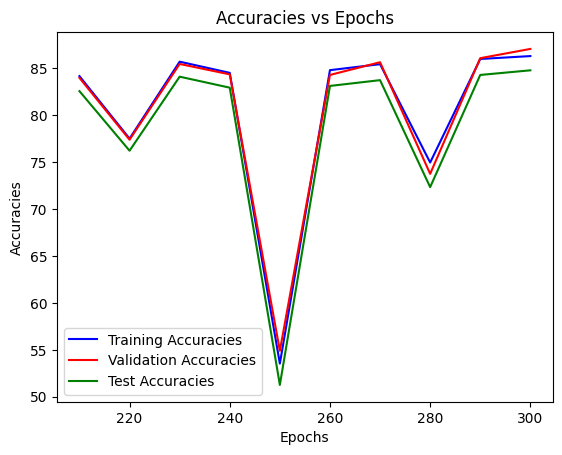

In [59]:
import matplotlib.pyplot as plt
epochs = [210,220,230,240,250,260,270,280,290,300]
lr = 0.0278
train_acc=[]
test_acc=[]
val_acc = []
for i in range(len(epochs)):
    model = Logistic(lr,epochs[i])
    model.train(X_train_MR,y_train_MR)
    train_acc.append(get_acc(model.predict(X_train_MR), y_train_MR))
    val_acc.append(get_acc(model.predict(X_val_MR), y_val_MR))
    test_acc.append(get_acc(model.predict(X_test_MR), y_test_MR))

plt.plot(epochs,train_acc, 'b', label='Training Accuracies')   
plt.plot(epochs,val_acc, 'r', label='Validation Accuracies')
plt.plot(epochs,test_acc, 'g', label='Test Accuracies')
plt.ylabel('Accuracies')    
plt.xlabel('Epochs') 
plt.title('Accuracies vs Epochs')
plt.legend()
plt.show()  

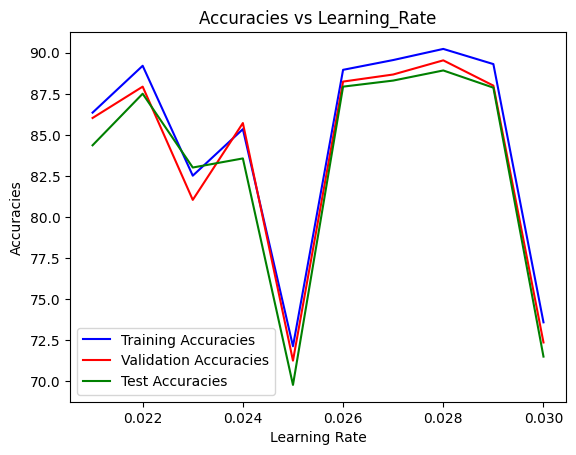

In [46]:
import matplotlib.pyplot as plt
epochs = 260
lr = [0.021,0.022,0.023,0.024,0.025,0.026,0.027,0.028,0.029,0.03]
train_acc=[]
test_acc=[]
val_acc = []
for i in range(len(lr)):
    model = Logistic(lr[i],epochs)
    model.train(X_train_MR,y_train_MR)
    train_acc.append(get_acc(model.predict(X_train_MR), y_train_MR))
    val_acc.append(get_acc(model.predict(X_val_MR), y_val_MR))
    test_acc.append(get_acc(model.predict(X_test_MR), y_test_MR))

plt.plot(lr,train_acc, 'b', label='Training Accuracies')   
plt.plot(lr,val_acc, 'r', label='Validation Accuracies')
plt.plot(lr,test_acc, 'g', label='Test Accuracies')
plt.title('Accuracies vs Learning_Rate')
plt.ylabel('Accuracies')    
plt.xlabel('Learning Rate') 
plt.legend()
plt.show()  